<a href="https://colab.research.google.com/github/LamiaAlobaid/DecisionTreeClassifier-heart-disease/blob/main/Decision_Tree_Classifier_to_predict_heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
# Reading our data file
heart_data = pd.read_csv("heart.csv")
# try to see the columns of our data to check everything is fine
heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [16]:
# our prediction target is 'target'
y = heart_data.target

# our features are all columns but the target
heart_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']
X = heart_data[heart_features]

# let's see our data or some of it
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [3]:
# we will use Scikit-learn, which is easily the most popular library for modeling the types of data typically stored in DataFrames.
from sklearn.model_selection import train_test_split

# first , we will split our data into: training and validation data.
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 1 , test_size = 0.30)

In [4]:
# after splitting our data , now let us use the training data to build our model
from sklearn.tree import DecisionTreeClassifier

# Define the model
heart_model = DecisionTreeClassifier()

# Fit the model which where the model Capture patterns from provided data (Train the model using the training data.).
heart_model = heart_model.fit(train_X, train_y)

# the result of our model prediction after trainig it
# print(heart_model.predict(train_X))
print(heart_model.predict(test_X))

[0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1
 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0
 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1]


Before solving the overfit:

              precision    recall  f1-score   support

           0       0.66      0.71      0.68        41
           1       0.74      0.70      0.72        50

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

the confusion matrix:
[[29 12]
 [15 35]]


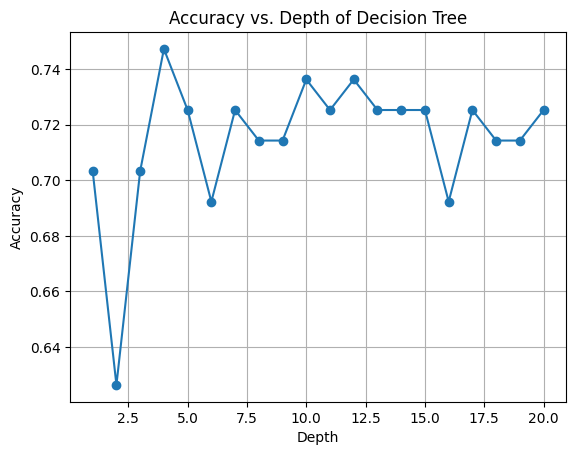

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report , confusion_matrix

#testing before solving the overfit

pred=heart_model.predict(test_X)
print("Before solving the overfit:\n")
print(classification_report(test_y, pred))
print("the confusion matrix:")
print(confusion_matrix(test_y, pred, labels=[0,1])) #[31,10] (class zero) means 31 predicted right as class zero and 10 means predicted false as class one

# Accuracy vs alpha plot
depths = range(1, 21)  # Range of alpha values to try
accuracies = []

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(train_X, train_y)
    accuracies.append(model.score(test_X, test_y))

plt.plot(depths, accuracies, marker='o')
plt.title('Accuracy vs. Depth of Decision Tree')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

visualizing the tree before solving the overfitting


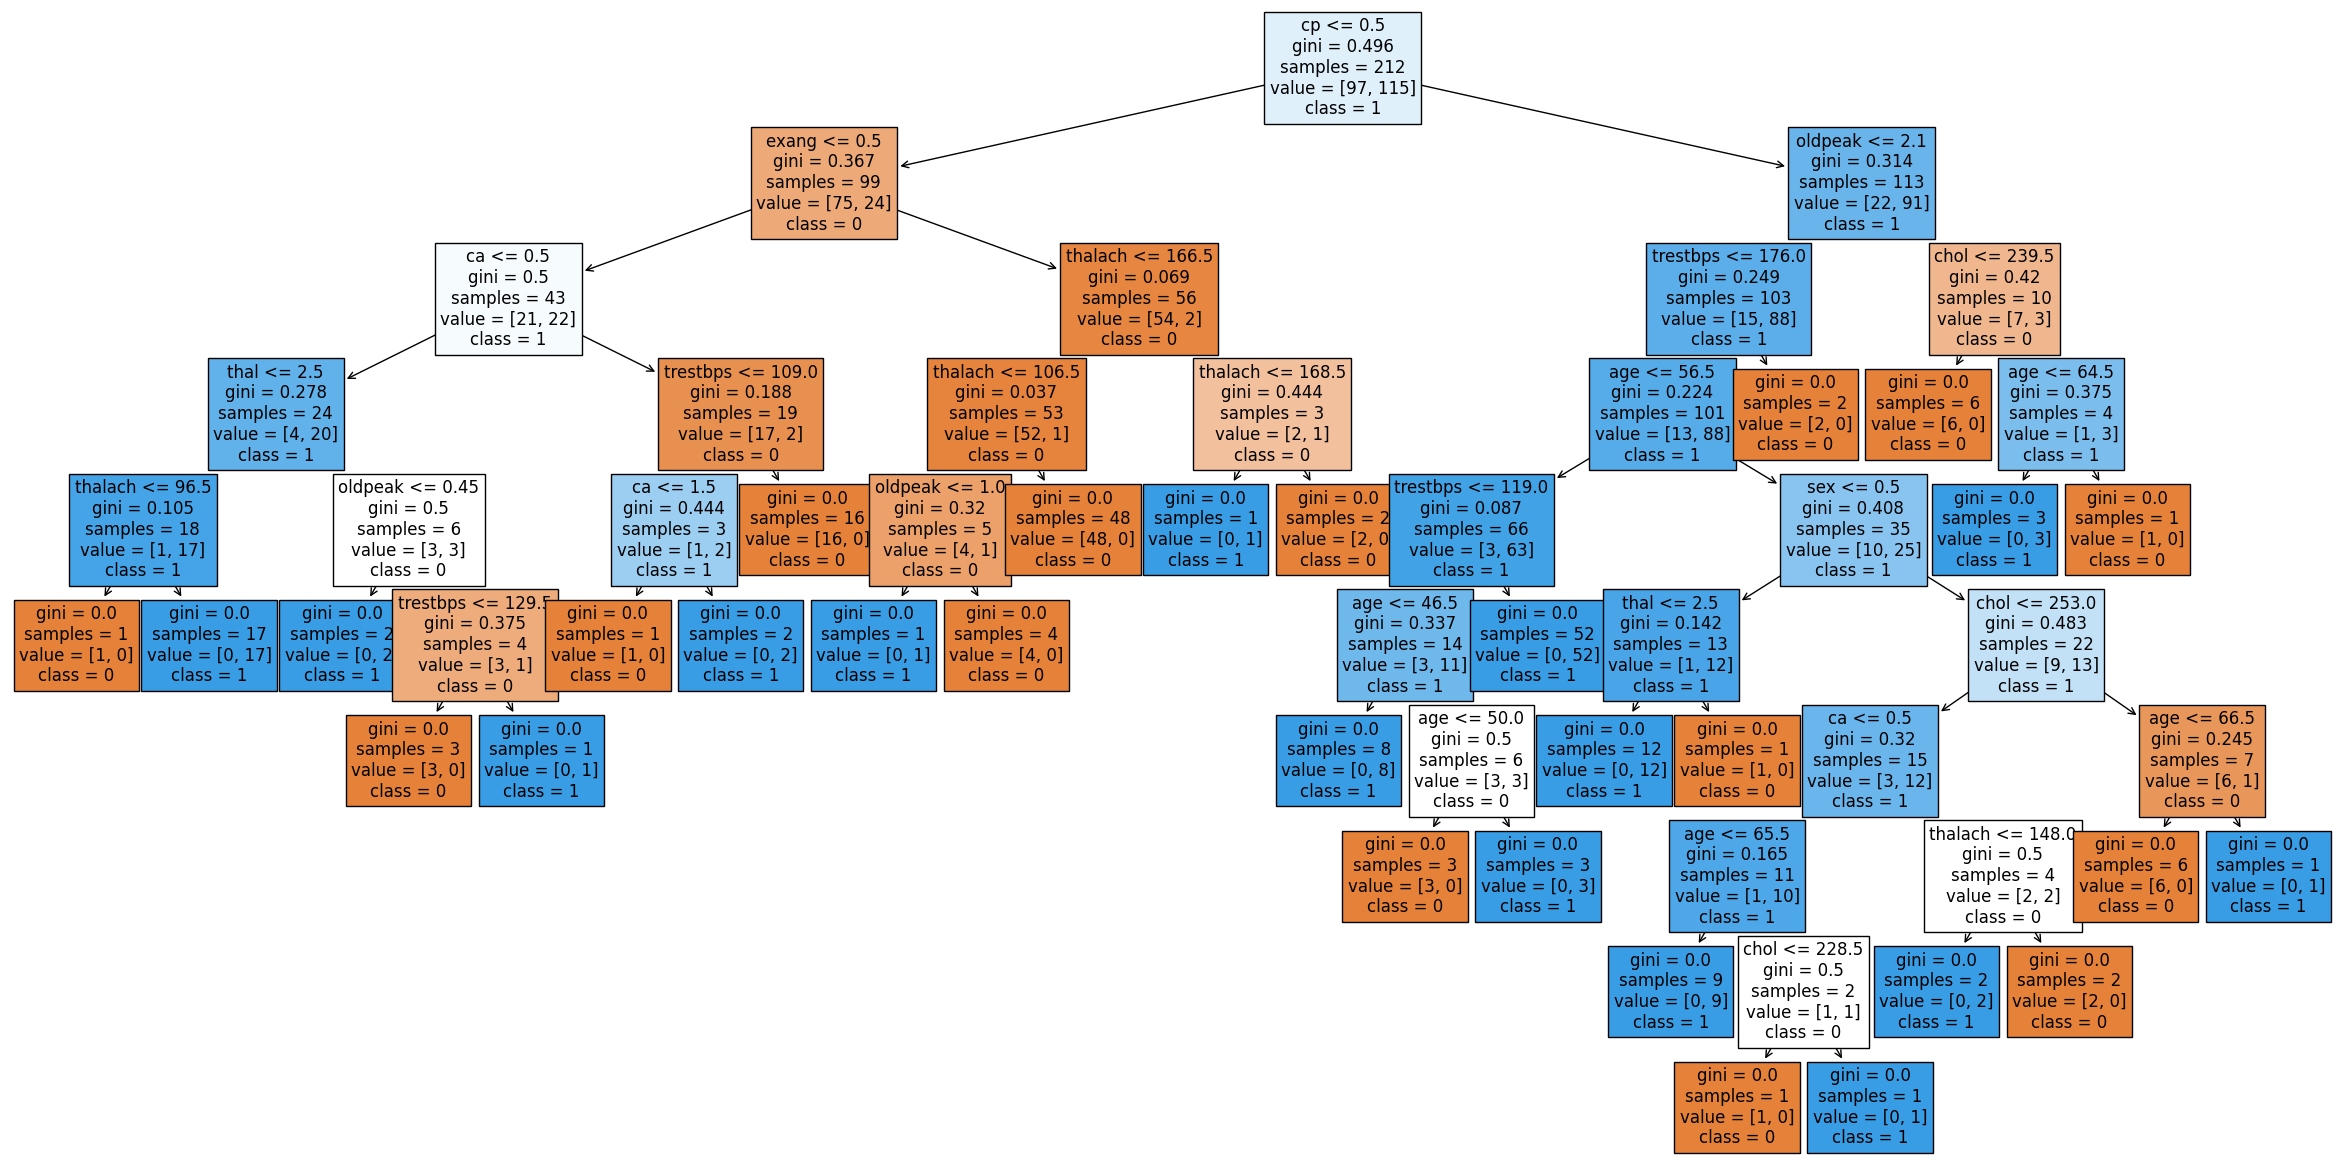

In [6]:
#importing tree from sklearn and pyplot from matplotlib (MATLAB) that are important for visualizing the decision tree
from sklearn import tree
from matplotlib import pyplot as plt

print("visualizing the tree before solving the overfitting")
fig = plt.figure(figsize=(30,15))
_ = tree.plot_tree(heart_model, #the tree before solving overfitting
                   feature_names=heart_data.columns,
                   class_names={0:'0', 1:'1'}, #class0: does not have a heart disease , class 1: has a heart disease
                   filled=True,
                  fontsize=12)
#first label at each node discribes the attribute that we split on as a threshold. For example, cp<= 0.5 goes left otherwise go right
#gini value means the purity of the samples of the class, the lower the gini is the higher of purity, 0 means all samples of only one class
#values = number of samples of each class

In [17]:
from sklearn.metrics import accuracy_score ,precision_score, average_precision_score , f1_score , recall_score

acc = accuracy_score(test_y, pred)
print("Accuracy: ",acc)

precision_macro = precision_score(test_y, pred, average='macro')
precision_micro = precision_score(test_y, pred, average='micro')
precision_weighted = precision_score(test_y, pred, average='weighted')
precision_multi_samples = precision_score(test_y, pred, average=None)
precision_average = average_precision_score(test_y, pred)

f1_macro = f1_score(test_y, pred, average='macro')
f1_micro = f1_score(test_y, pred, average='micro')
f1_weighted = f1_score(test_y, pred, average='weighted')
f1_multi_samples = f1_score(test_y, pred, average=None)
f1_average = f1_score(test_y,pred, average=None)

recall_marco = recall_score(test_y, pred, average='macro')
recall_micro = recall_score(test_y, pred, average='micro')
recall_weighted =recall_score(test_y, pred, average='weighted')
recall_multi_samples= recall_score(test_y, pred, average=None)
recall_average = recall_score(test_y, pred, average=None)

print("\t\tprecision\t\tf1\t\t\trecall")
print("macro\t\t{}\t{}\t{}".format(precision_macro,f1_macro,recall_marco))
print("micro\t\t{}\t{}\t{}".format(precision_micro,f1_micro,recall_micro))
print("weighted\t{}\t{}\t{}".format(precision_weighted,f1_weighted,recall_weighted))
print("multi_samples\t{}\t{}\t{}".format(precision_multi_samples,f1_multi_samples,f1_multi_samples))
print("average\t\t{}\t{}\t{}".format(precision_average,f1_average,recall_average))

Accuracy:  0.7032967032967034
		precision		f1			recall
macro		0.7018858800773694	0.7020012128562765	0.7036585365853658
micro		0.7032967032967034	0.7032967032967034	0.7032967032967034
weighted	0.7061183497353709	0.7039444485169166	0.7032967032967034
multi_samples	[0.65909091 0.74468085]	[0.68235294 0.72164948]	[0.68235294 0.72164948]
average		0.6861117605798457	[0.68235294 0.72164948]	[0.70731707 0.7       ]


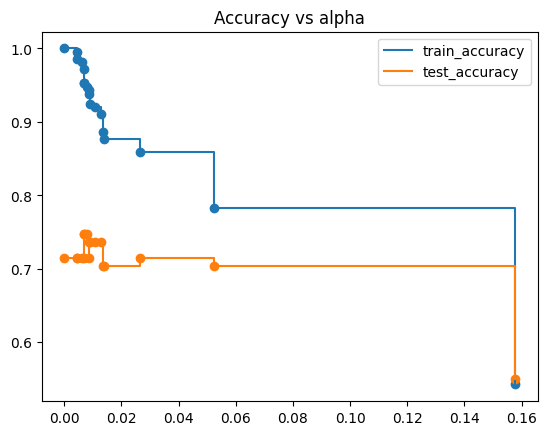

Train score: 0.9528301886792453
Test score: 0.7472527472527473


<Figure size 1000x400 with 0 Axes>

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix
#train_X, test_X, train_y, test_y

#Alpha is a parameter that controls the complexity of the decision tree.
# Higher values of alpha result in simpler (more pruned) trees, whereas lower values allow for more complex (less pruned) trees.
# Calculate the cost-complexity pruning path
path = DecisionTreeClassifier().cost_complexity_pruning_path(train_X, train_y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

#ccp_alphas: are the specific alpha values found during the cost-complexity pruning path computation.
# Each ccp_alpha corresponds to a different pruned version of the tree.
# impurities represent the total impurity (misclassification) of the tree for each alpha value.

# For each alpha, train and evaluate the model
clfs = []
train_acc = []
test_acc = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(train_X, train_y)
    clfs.append(clf)
    y_train_pred = clf.predict(train_X)
    y_test_pred = clf.predict(test_X)
    train_acc.append(accuracy_score(y_train_pred, train_y))
    test_acc.append(accuracy_score(y_test_pred, test_y))

# Plotting accuracy vs alpha
plt.scatter(ccp_alphas, train_acc)
plt.scatter(ccp_alphas, test_acc)
plt.plot(ccp_alphas, train_acc, label='train_accuracy', drawstyle="steps-post")
plt.plot(ccp_alphas, test_acc, label='test_accuracy', drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

# Choose the model with the optimal alpha
best_alpha = ccp_alphas[test_acc.index(max(test_acc))]
clf_best = DecisionTreeClassifier(random_state=0, ccp_alpha=best_alpha)
clf_best.fit(train_X, train_y)

# Evaluate the best model on train and test data
y_train_pred = clf_best.predict(train_X)
y_test_pred = clf_best.predict(test_X)

print(f'Train score: {accuracy_score(y_train_pred, train_y)}')
print(f'Test score: {accuracy_score(y_test_pred, test_y)}')

plt.figure(figsize=(10, 4))

plt.tight_layout()
plt.show()

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report , confusion_matrix

#testing after solving the overfit

pred=heart_model.predict(test_X)
print("After solving the overfit:\n")
print(classification_report(y_test_pred, test_y))
print("The confusion Matrix: \n", confusion_matrix(y_test_pred, test_y))


After solving the overfit:

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        46
           1       0.72      0.80      0.76        45

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.75      0.75      0.75        91

The confusion Matrix: 
 [[32 14]
 [ 9 36]]


In [21]:
from sklearn.metrics import  precision_score, average_precision_score , f1_score , recall_score

#testing after solving the overfit

precision_macro = precision_score(y_test_pred, test_y, average='macro')
precision_micro = precision_score(y_test_pred, test_y, average='micro')
precision_weighted = precision_score(y_test_pred, test_y, average='weighted')
precision_multi_samples = precision_score(y_test_pred, test_y, average=None)
precision_average = average_precision_score(y_test_pred, test_y)

f1_macro = f1_score(y_test_pred, test_y, average='macro')
f1_micro = f1_score(y_test_pred, test_y, average='micro')
f1_weighted = f1_score(y_test_pred, test_y, average='weighted')
f1_multi_samples = f1_score(y_test_pred, test_y, average=None)
f1_average = f1_score(y_test_pred,test_y, average=None)

recall_marco = recall_score(y_test_pred, test_y, average='macro')
recall_micro = recall_score(y_test_pred, test_y, average='micro')
recall_weighted =recall_score(y_test_pred, test_y, average='weighted')
recall_multi_samples= recall_score(y_test_pred, test_y, average=None)
recall_average = recall_score(y_test_pred, test_y, average=None)

print("\t\tprecision\t\tf1\t\t\trecall")
print("macro\t\t{}\t{}\t{}".format(precision_macro,f1_macro,recall_marco))
print("micro\t\t{}\t{}\t{}".format(precision_micro,f1_micro,recall_micro))
print("weighted\t{}\t{}\t{}".format(precision_weighted,f1_weighted,recall_weighted))
print("multi_samples\t{}\t{}\t{}".format(precision_multi_samples,f1_multi_samples,f1_multi_samples))
print("average\t\t{}\t{}\t{}".format(precision_average,f1_average,recall_average))

		precision		f1			recall
macro		0.7502439024390244	0.7467634603750757	0.7478260869565218
micro		0.7472527472527473	0.7472527472527473	0.7472527472527473
weighted	0.7505762530152775	0.7466411386556577	0.7472527472527473
multi_samples	[0.7804878 0.72     ]	[0.73563218 0.75789474]	[0.73563218 0.75789474]
average		0.6749010989010988	[0.73563218 0.75789474]	[0.69565217 0.8       ]


visualizing the tree after solving the overfitting


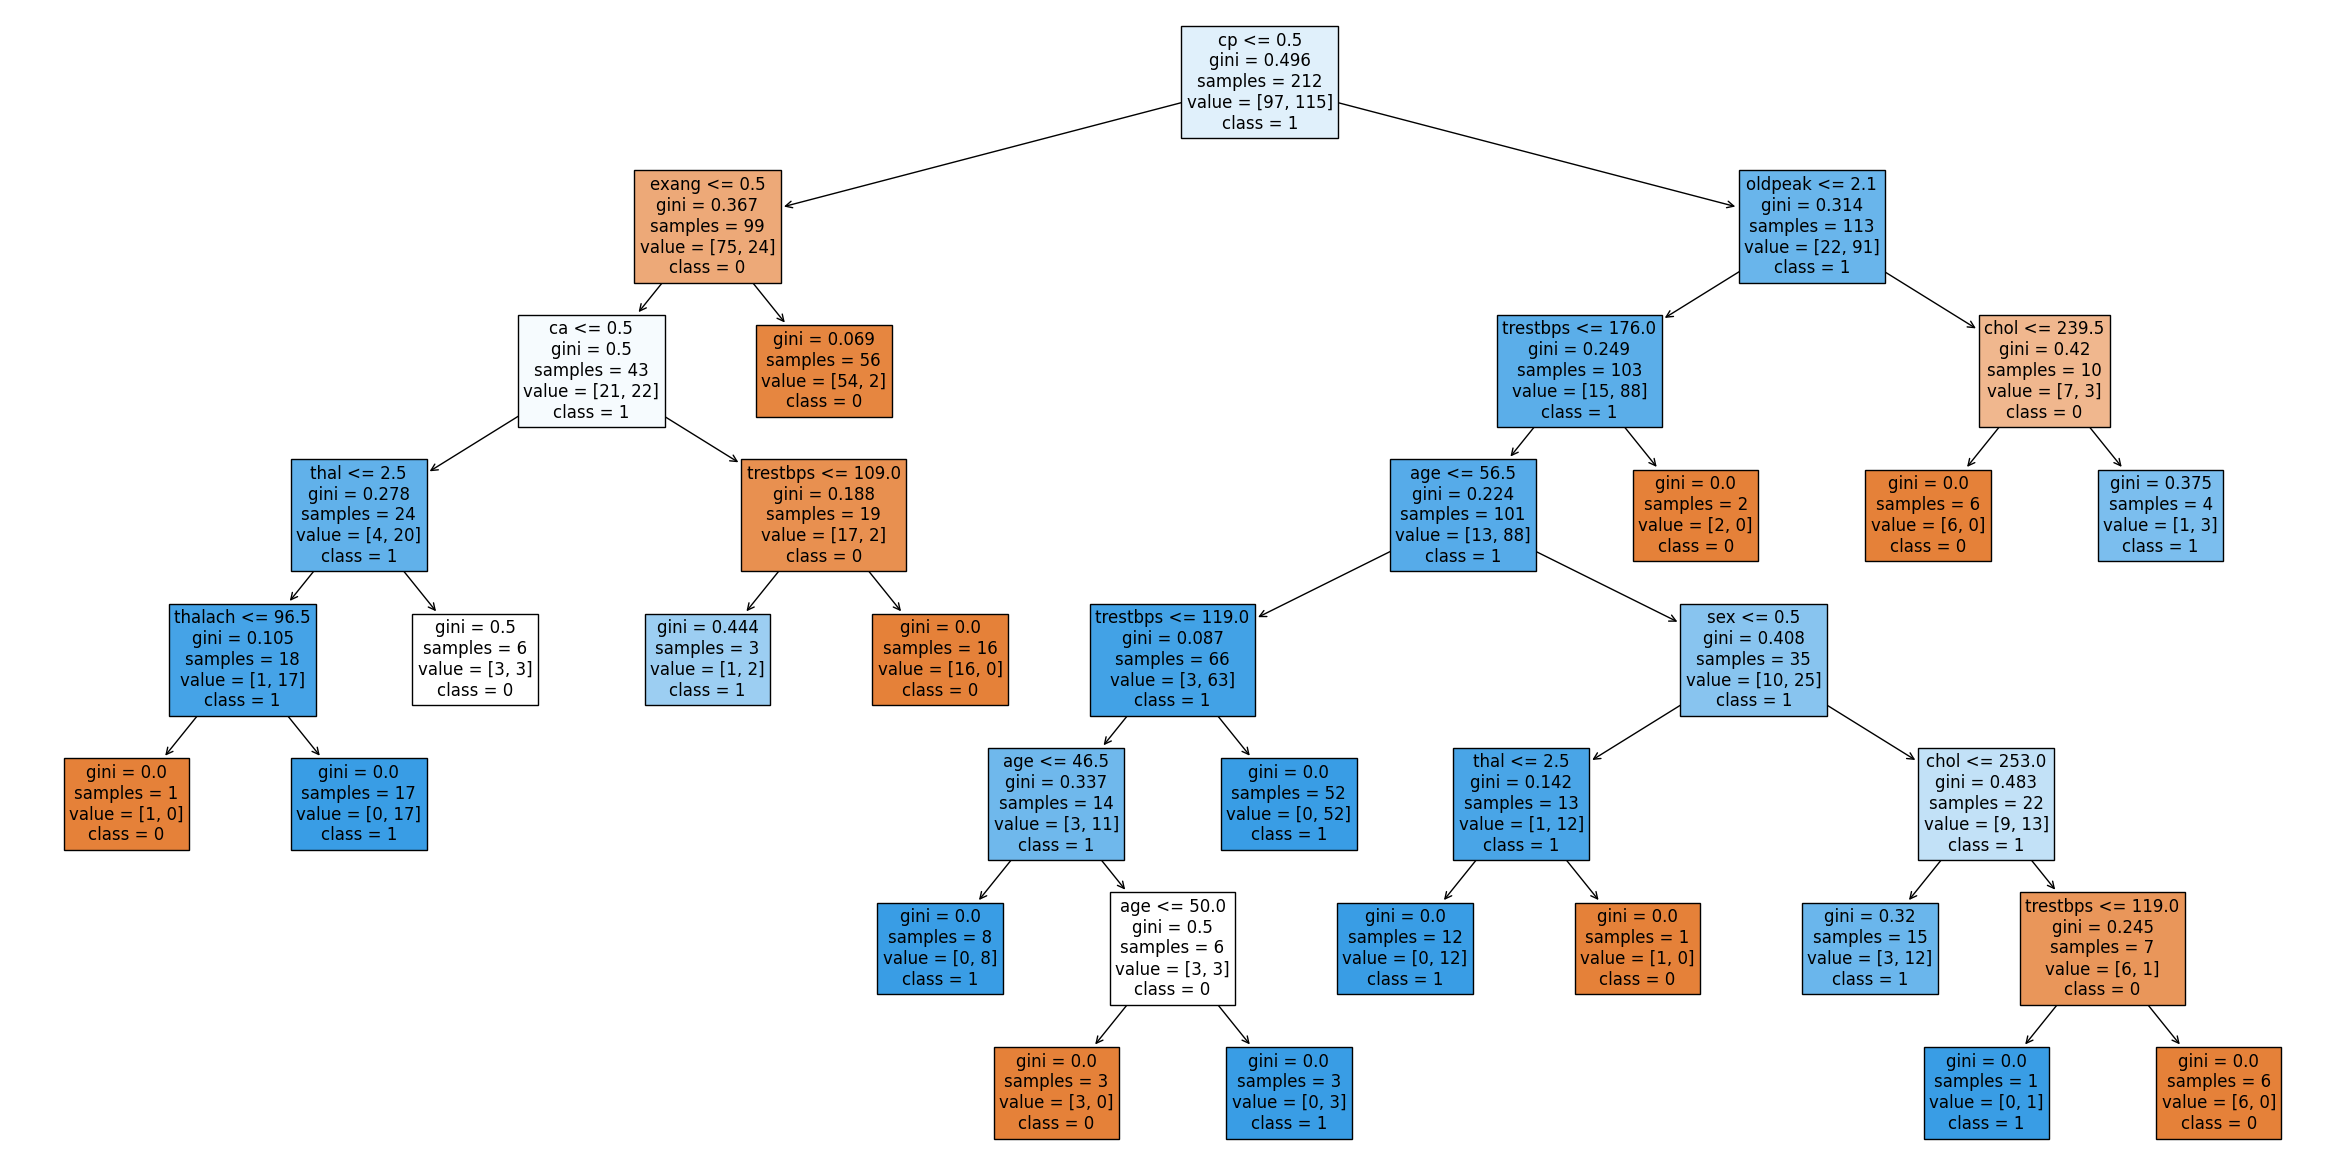

In [11]:
#importing tree from sklearn and pyplot from matplotlib (MATLAB) that are important for visualizing the decision tree
from sklearn import tree
from matplotlib import pyplot as plt

print("visualizing the tree after solving the overfitting")
fig = plt.figure(figsize=(30,15))
_ = tree.plot_tree(clf_best, #the tree after solving overfitting
                   feature_names=heart_data.columns,
                   class_names={0:'0', 1:'1'}, #class0: does not have a heart disease , class 1: has a heart disease
                   filled=True,
                  fontsize=12)
#first label at each node discribes the attribute that we split on as a threshold. For example, cp<= 0.5 goes left otherwise go right
#gini value means the purity of the samples of the class, the lower the gini is the higher of purity, 0 means all samples of only one class
#values = number of samples of each class